<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Downsampling</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Введение

**Подготовка данных**

Сначала, подготовим данные, разделим их на обучающую и тестовую выборки, обойдемся без валидационной, потому что будем пользоваться кросс-валидацией. Также применим OHE или прямое кодирование, и масштабирование численных признаков.

**Исследование задачи**

Исследуем баланс классов целевого признака. После без учета дизбаланса произведем обучение различных моделей.

**Борьба с дизбалансом**

Применим медоты борьбы с дизбалансом: увеличение выборки, уменьшение выборки и изменение порога.

**Тестирование модели**

Протестируем лучшую модель на тестовой выборки, затем сравним ее адекватность со случайной моделью. Сделаем выводы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, f1_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

## Подготовка данных

In [2]:
try:
    data = pd.read_csv('C:/datasets/Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Как мы видим в столбце Tenure есть пропуски, столбец количественный, значит необходимо пропуски обработать: удалить весь столбец или все строки с пропусками.Столбец лучше всего оставить, по моему мнению, это ценный признак.

При формировании данных **features** мы исключим участие столбцов **RowNumber**, **RowNumber** и **Surname**, так как это не признаки, а всего лишь идентификационная информация.
</div>




In [7]:
data['Tenure'].fillna(-1, inplace=True)
data['Tenure'] = data['Tenure'].astype('object')
data['Tenure'].dtypes

dtype('O')

<div class="alert alert-block alert-info">
<b>Изменения:</b> Я решил применить 2 вариант, так как в данных уже есть новые клиенты со значением "0", поэтому я посчитал странным, что NaN могли быть неучтенные новые пользователи. 2 Вариант показался мне более правильным. 
</div>

In [8]:
data_ohe = pd.get_dummies(data.drop(['RowNumber','CustomerId','Surname'], axis=1), drop_first=True)
target = data_ohe['Exited']
features = data_ohe.drop(['Exited'], axis=1)
print('Размер данных признаков:', features.shape)
print('Размер данных целевого признака:', target.shape)

Размер данных признаков: (10000, 21)
Размер данных целевого признака: (10000,)


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Масштабирование численных признаков.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Разделение данных на обучающую и тестовую выборки.
</div>

In [10]:
features_train, features_test, target_train, target_test, = train_test_split(features,target, train_size=0.8, random_state=12345, stratify = target)
features_train.reset_index(drop=True, inplace=True)
target_train.reset_index(drop=True, inplace=True)
features_test.reset_index(drop=True, inplace=True)
target_test.reset_index(drop=True, inplace=True)
print('Общий размер:', features.shape, target.shape, 
      '\nРазмер тренировочной выборки:', features_train.shape, target_train.shape,
      '\nРазмер тестовой выборки:', features_test.shape, target_test.shape)

Общий размер: (10000, 21) (10000,) 
Размер тренировочной выборки: (8000, 21) (8000,) 
Размер тестовой выборки: (2000, 21) (2000,)


In [11]:
numeric = ['CreditScore', 'Age','NumOfProducts', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

<div class="alert alert-block alert-info">
<b>Изменения:</b> Масштабирование после разделение данных
</div>

## Исследование задачи

In [12]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
print('Отношение классов целевого признака:',target_train[target_train == 0].shape[0]
      /target_train[target_train == 1].shape[0])

Отношение классов целевого признака: 3.9079754601226995


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Дизбаланс между классами целевого объекта почти в 4 раза.
</div>

In [14]:
kf = KFold(n_splits=5, shuffle=False)

In [15]:
model_tree = DecisionTreeClassifier(random_state=12345)
parametrs = {'max_depth': range (1,10),
             'min_samples_leaf': range (1,8),
             'min_samples_split': range (1,8) }
grid_tree = GridSearchCV(model_tree, parametrs, cv=kf, scoring = 'f1', n_jobs=-1)
grid_tree.fit(features_train, target_train)
print("F1:", grid_tree.best_score_)
print("Параметры модели дерева решений:", grid_tree.best_params_)

F1: 0.5699794201621936
Параметры модели дерева решений: {'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 2}


In [16]:
model_logistic_reg = LogisticRegression(random_state=12345)
parametrs_logistic = {'max_iter': range(100,2001,100),
                     'solver': ['lbfgs','liblinear']}
grid_logistic = GridSearchCV(model_logistic_reg, parametrs_logistic, cv=kf, scoring = 'f1', n_jobs=-1)
grid_logistic.fit(features_train, target_train)
print("F1:", grid_logistic.best_score_)
print("Параметры модели логистическая регрессия:", grid_logistic.best_params_)

F1: 0.3220776060946398
Параметры модели логистическая регрессия: {'max_iter': 100, 'solver': 'liblinear'}


In [17]:
model_forest =  RandomForestClassifier(random_state=12345)
parametrs_forest = {'n_estimators': range (10, 101, 10),
                    'max_depth': range (1, 10)}
grid_forest = GridSearchCV(model_forest, parametrs_forest, cv=kf, scoring = 'f1', n_jobs=-1)
grid_forest.fit(features_train, target_train)
print("F1:", grid_forest.best_score_)
print("Параметры модели лес:", grid_forest.best_params_)

F1: 0.530924502938025
Параметры модели лес: {'max_depth': 9, 'n_estimators': 90}


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Как можно заметить, даже с кросс-валидацией, ни одна модель не смогла перейти порог F1 метрики в 0.59.
</div>

## Борьба с дисбалансом

### Upsampling

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Будем увеличивать выборку, а именно продублируем и перемешаем данные с наименьшим по количествую классом.
</div>

In [18]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


In [19]:
def score_model_upsample(model, params, repeat, features_train, target_train, cv=None):
    if cv is None:
        cv =  KFold(n_splits=5, shuffle=False)
        
    scores = []
    for train_fold_index, val_fold_index in cv.split(features_train, target_train):
        # Get the training data
        features_train_fold, target_train_fold = features_train.iloc[train_fold_index], target_train[train_fold_index]
        # Get the validation data
        features_val_fold, target_val_fold = features_train.iloc[val_fold_index], target_train[val_fold_index]

        # Upsample only the data in the training section
        features_train_fold_upsample, target_train_fold_upsample = upsample(features_train_fold, target_train_fold,repeat)
        # Fit the model on the upsampled training data
        model_obj = model(**params).fit(features_train_fold_upsample, target_train_fold_upsample)
        # Score the model on the (non-upsampled) validation data
        score = f1_score(target_val_fold, model_obj.predict(features_val_fold))
        scores.append(score)
    return np.array(scores)

In [20]:
repeat = 3

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Так как выборка в отличается в 4 раза, для рановесия классов логичнее умножать на 4, но так мы можем переборщить с повторами, лучше всего увеличивать в 3 раза, так лучше значения F1 меры.
</div>

In [21]:
score_tracker_tree = []
for max_depth in range(1,10):
    for min_samples_leaf in range(1,8):
        for min_samples_split in  range(2,8):
            example_params = {'max_depth': max_depth,
                              'min_samples_leaf': min_samples_leaf,
                              'min_samples_split': min_samples_split,
                              'random_state': 12345
                             }
            example_params['f1'] = score_model_upsample(DecisionTreeClassifier, example_params, repeat, 
                                               features_train,target_train,kf).mean()
            score_tracker_tree.append(example_params)
sorted(score_tracker_tree, key=lambda x: x['f1'], reverse=True)[0]

{'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'random_state': 12345,
 'f1': 0.5775387308957038}

In [22]:
score_tracker_logistic = []
for max_iter in range(100,2001,100):
    for solver in ['lbfgs','liblinear']:
        example_params = {'max_iter': max_iter,
                          'solver': solver}
        example_params['f1'] = score_model_upsample(LogisticRegression, example_params, repeat, 
                                               features_train,target_train,kf).mean()
        score_tracker_logistic.append(example_params)
sorted(score_tracker_logistic, key=lambda x: x['f1'], reverse=True)[0]

{'max_iter': 100, 'solver': 'lbfgs', 'f1': 0.4939070425637633}

In [23]:
score_tracker_forest = []
for n_estimators in range (10, 311, 50):
    for max_depth in range (1, 13):
        example_params = {'n_estimators': n_estimators,
                          'max_depth': max_depth,
                          'random_state': 12345}
        example_params['f1'] = score_model_upsample(RandomForestClassifier, example_params, repeat, 
                                               features_train,target_train,kf).mean()
        score_tracker_forest.append(example_params)
sorted(score_tracker_forest, key=lambda x: x['f1'], reverse=True)[0]

{'n_estimators': 260,
 'max_depth': 10,
 'random_state': 12345,
 'f1': 0.6204754779103586}

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Лидирует случайный лес, при этом он единственный и преодолел порог в значение 0.59.
</div>

### Downsampling

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Будем уменьшать выборку, а именно ту часть, где классы встречаются чаще.
</div>

In [24]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [25]:
def score_model_downsample(model, params, frac, features_train, target_train, cv=None):

    if cv is None:
        cv =  KFold(n_splits=5, shuffle=False)
        
    scores = []

    for train_fold_index, val_fold_index in cv.split(features_train, target_train):
        # Get the training data
        features_train_fold, target_train_fold = features_train.iloc[train_fold_index], target_train[train_fold_index]
        # Get the validation data
        features_val_fold, target_val_fold = features_train.iloc[val_fold_index], target_train[val_fold_index]

        # Upsample only the data in the training section
        features_train_fold_upsample, target_train_fold_upsample = downsample(features_train_fold, target_train_fold,frac)
        # Fit the model on the upsampled training data
        model_obj = model(**params).fit(features_train_fold_upsample, target_train_fold_upsample)
        # Score the model on the (non-upsampled) validation data
        score = f1_score(target_val_fold, model_obj.predict(features_val_fold))
        scores.append(score)
    return np.array(scores)

In [26]:
frac=0.33

In [27]:
score_tracker_tree = []
for max_depth in range(1,10):
    for min_samples_leaf in range(1,8):
        for min_samples_split in  range(2,8):
            example_params = {'max_depth': max_depth,
                              'min_samples_leaf': min_samples_leaf,
                              'min_samples_split': min_samples_split,
                              'random_state': 12345
                             }
            example_params['f1'] = score_model_downsample(DecisionTreeClassifier, example_params, frac, 
                                               features_train,target_train,kf).mean()
            score_tracker_tree.append(example_params)
sorted(score_tracker_tree, key=lambda x: x['f1'], reverse=True)[0]

{'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 12345,
 'f1': 0.5760085036048446}

In [28]:
score_tracker_logistic = []
for max_iter in range(100,2001,100):
    for solver in ['lbfgs','liblinear']:
        example_params = {'max_iter': max_iter,
                          'solver': solver}
        example_params['f1'] = score_model_downsample(LogisticRegression, example_params, frac, 
                                               features_train,target_train,kf).mean()
        score_tracker_logistic.append(example_params)
sorted(score_tracker_logistic, key=lambda x: x['f1'], reverse=True)[0]

{'max_iter': 100, 'solver': 'lbfgs', 'f1': 0.49485236374457314}

In [29]:
score_tracker_forest = []
for n_estimators in range (10, 101, 10):
    for max_depth in range (1, 10):
        example_params = {'n_estimators': n_estimators,
                          'max_depth': max_depth,
                          'random_state': 12345}
        example_params['f1'] = score_model_downsample(RandomForestClassifier, example_params, frac, 
                                               features_train,target_train,kf).mean()
        score_tracker_forest.append(example_params)
sorted(score_tracker_forest, key=lambda x: x['f1'], reverse=True)[0]

{'n_estimators': 70,
 'max_depth': 8,
 'random_state': 12345,
 'f1': 0.6056404328798984}

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Аналогично, с предыдущим пунктом лучший показателей у случайного леса, однако в целом по всем моделя метрика F1 ниже, в сравнении с методом upsampling.
</div> 

## Тестирование модели

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Выбираем модель случайного леса, обученную с помощью upsamling, с параметрами: n_estimators: 260, max_depth: 10, random_state: 12345.
</div> 

In [30]:
best_model = RandomForestClassifier(n_estimators=260, max_depth=10, random_state=12345)
features_train_upsample, target_train_upsample = upsample(features_train, target_train, repeat)
best_model.fit(features_train_upsample,target_train_upsample)
f1_score(target_test, best_model.predict(features_test))

0.6467065868263473

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> F1 метрика на тестовой выборке соответствует условию задачи.
</div> 

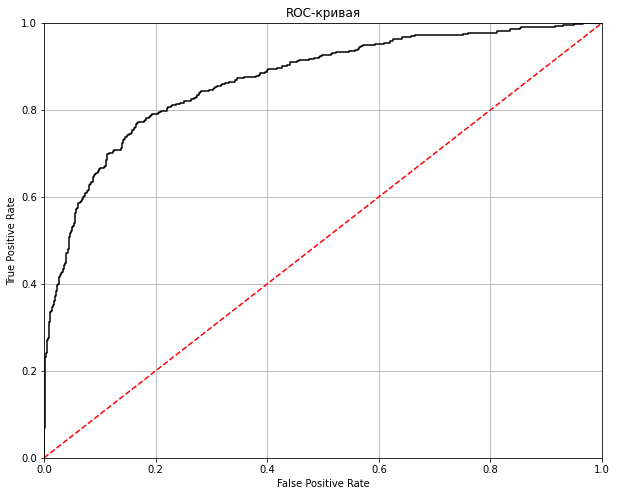

In [31]:
probabilities_test = best_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.grid(visible=True)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

In [32]:
print('Площадь под графиком (AUC-ROC):',roc_auc_score(target_test,probabilities_one_test))

Площадь под графиком (AUC-ROC): 0.8686313432076145


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Показатель AUC-ROC выше, чем у случайной модели, что показывает качественнность полученной.
</div> 

## Вывод

Задача по поиску модели, которая бы предсказывала клиентов, которые потенциально могут уйти, выполнена. Полученная модель на тестостой выборке имеет показатели F1 меры, которые укладываются в заданные. Касательно проделанной работы могу отметить, что без балансировки данных очень тяжело. Ни одна модель не смогла перейти порог F1 меры в 0.59. Поэтому борьба с дисбалансом оказалась важной составляющей. Пусть и с ней не все модели смогли преодолеть порог, но модель случайного леса показала себя хорошо, как при **upsamling**, так и при **downsampling**, но в первом случае лучше, поэтому и была выбрана. График **ROC-кривой** дополнительно подтверждает работоспособность модели.  